# Student Grades Prediction Project

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, accuracy_score


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.pipeline import make_pipeline
%config InlineBackend.figure_format = 'retina'
     

In [3]:
data=pd.read_csv('Grades.csv')

In [4]:
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [5]:
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [6]:
data.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [7]:
data.shape

(571, 43)

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CGPA,571.0,2.954888,0.620552,0.8,2.538,3.029,3.451,3.985


In [10]:
print('Total number of students:',len(data))

Total number of students: 571


In [11]:
data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [20]:
#display sample(5)
data.sample(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
513,CS-97514,B-,C+,A,B-,B-,C,A-,A-,B,...,B+,C,A-,D,D,C+,B+,C,F,2.489
457,CS-97458,C-,C+,B+,D,D+,B,B,A,B,...,B-,C,A,F,D+,B+,A-,C+,D,2.334
116,CS-97117,A-,C,A-,B+,B+,A,D+,A-,A-,...,C-,B-,C,C-,A,A-,A-,B-,A-,2.999
290,CS-97291,B,C,B,C+,B+,B,B,B+,B+,...,A+,B,A-,B-,NaN,A,B,A-,B,3.071
268,CS-97269,A,A-,B+,A-,A-,A-,B+,A-,A-,...,A-,B,A,B-,B,A-,A-,A-,A-,3.473


In [21]:
data.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [9]:
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [22]:
data.isnull()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
data.isnull().sum().any()

True

In [24]:
#check unique no.
data.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [25]:
data.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [26]:
data.describe

<bound method NDFrame.describe of      Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS

C:\Users\shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PH-121', ylabel='CGPA'>

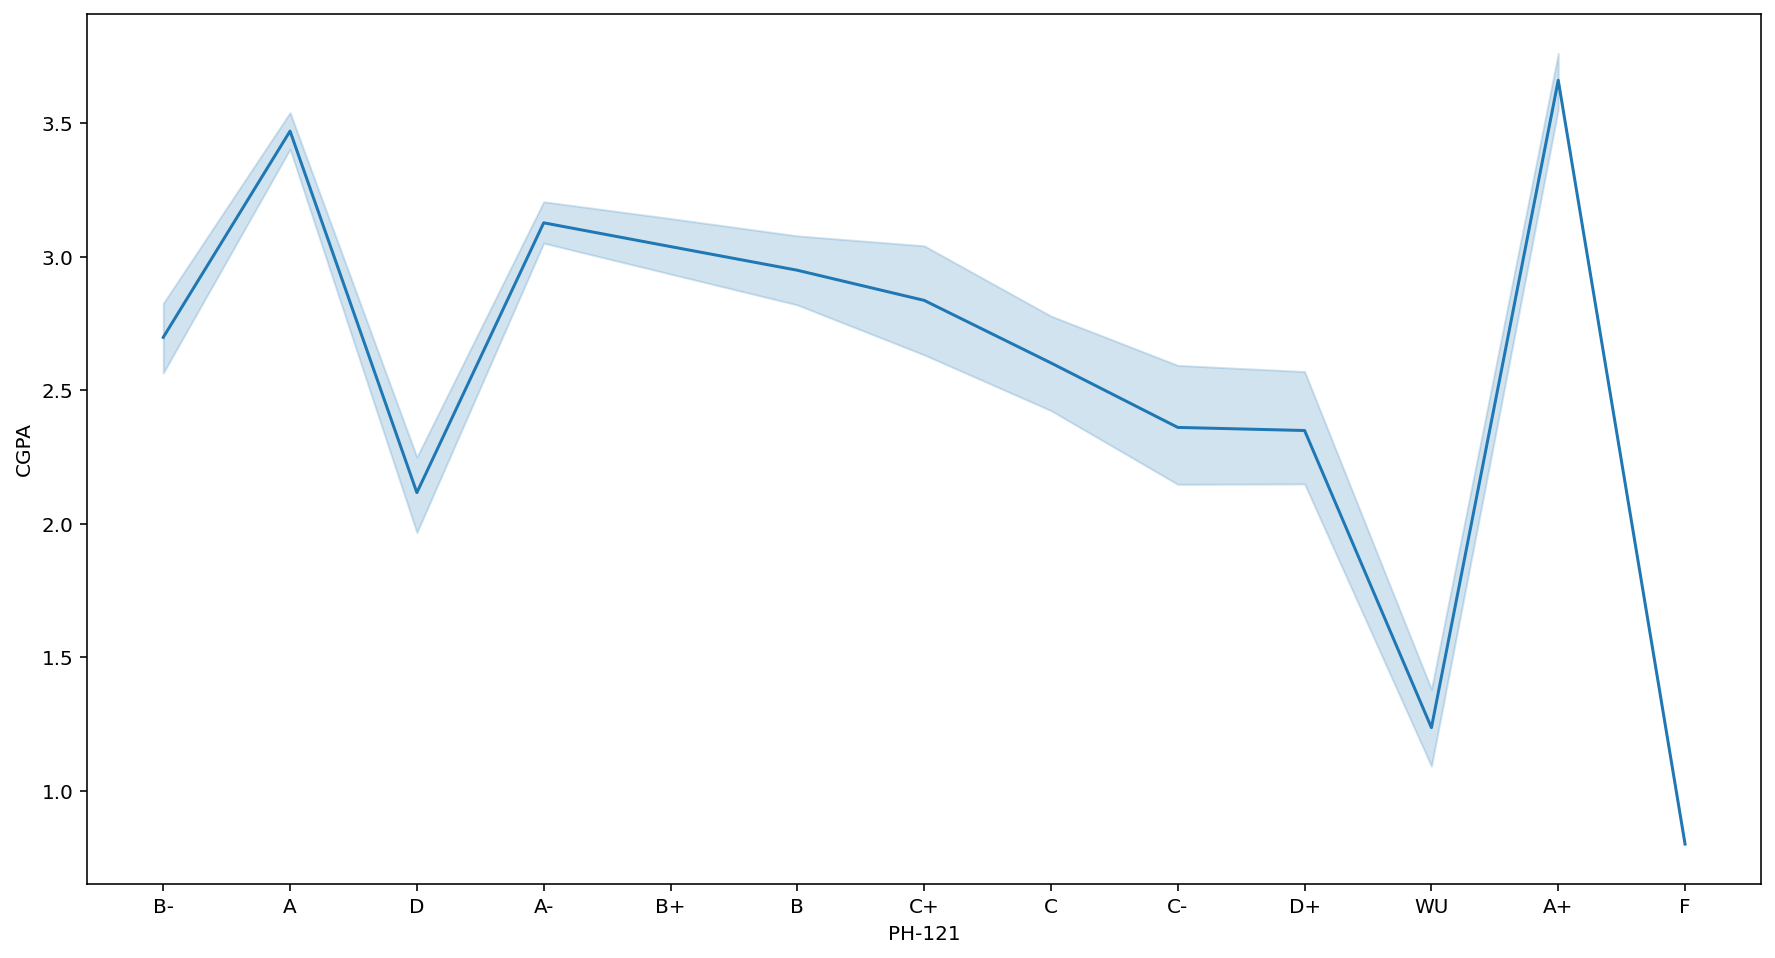

In [36]:
plt.figure(figsize=(15,8))
sns.lineplot(data['PH-121'],
              data['CGPA'])

C:\Users\shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CY-105', ylabel='CGPA'>

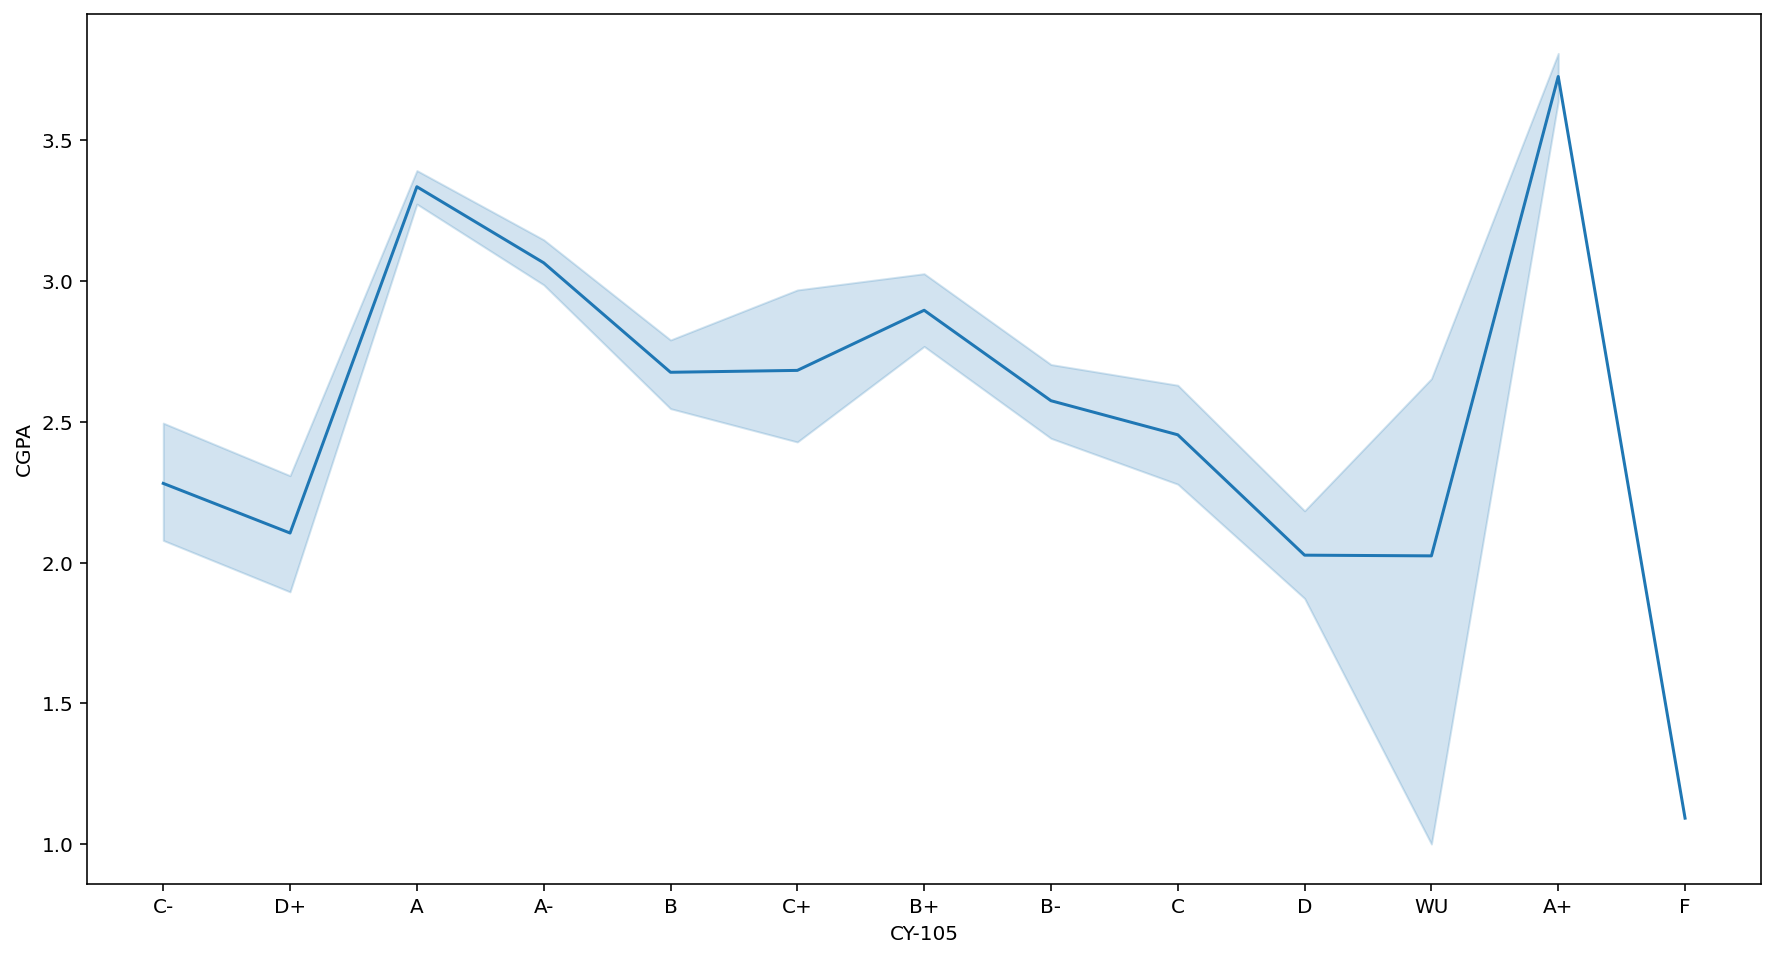

In [43]:
plt.figure(figsize=(15,8))
sns.lineplot(data['CY-105'],
              data['CGPA'])

# STRIPPLOT

C:\Users\shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PH-121', ylabel='CGPA'>

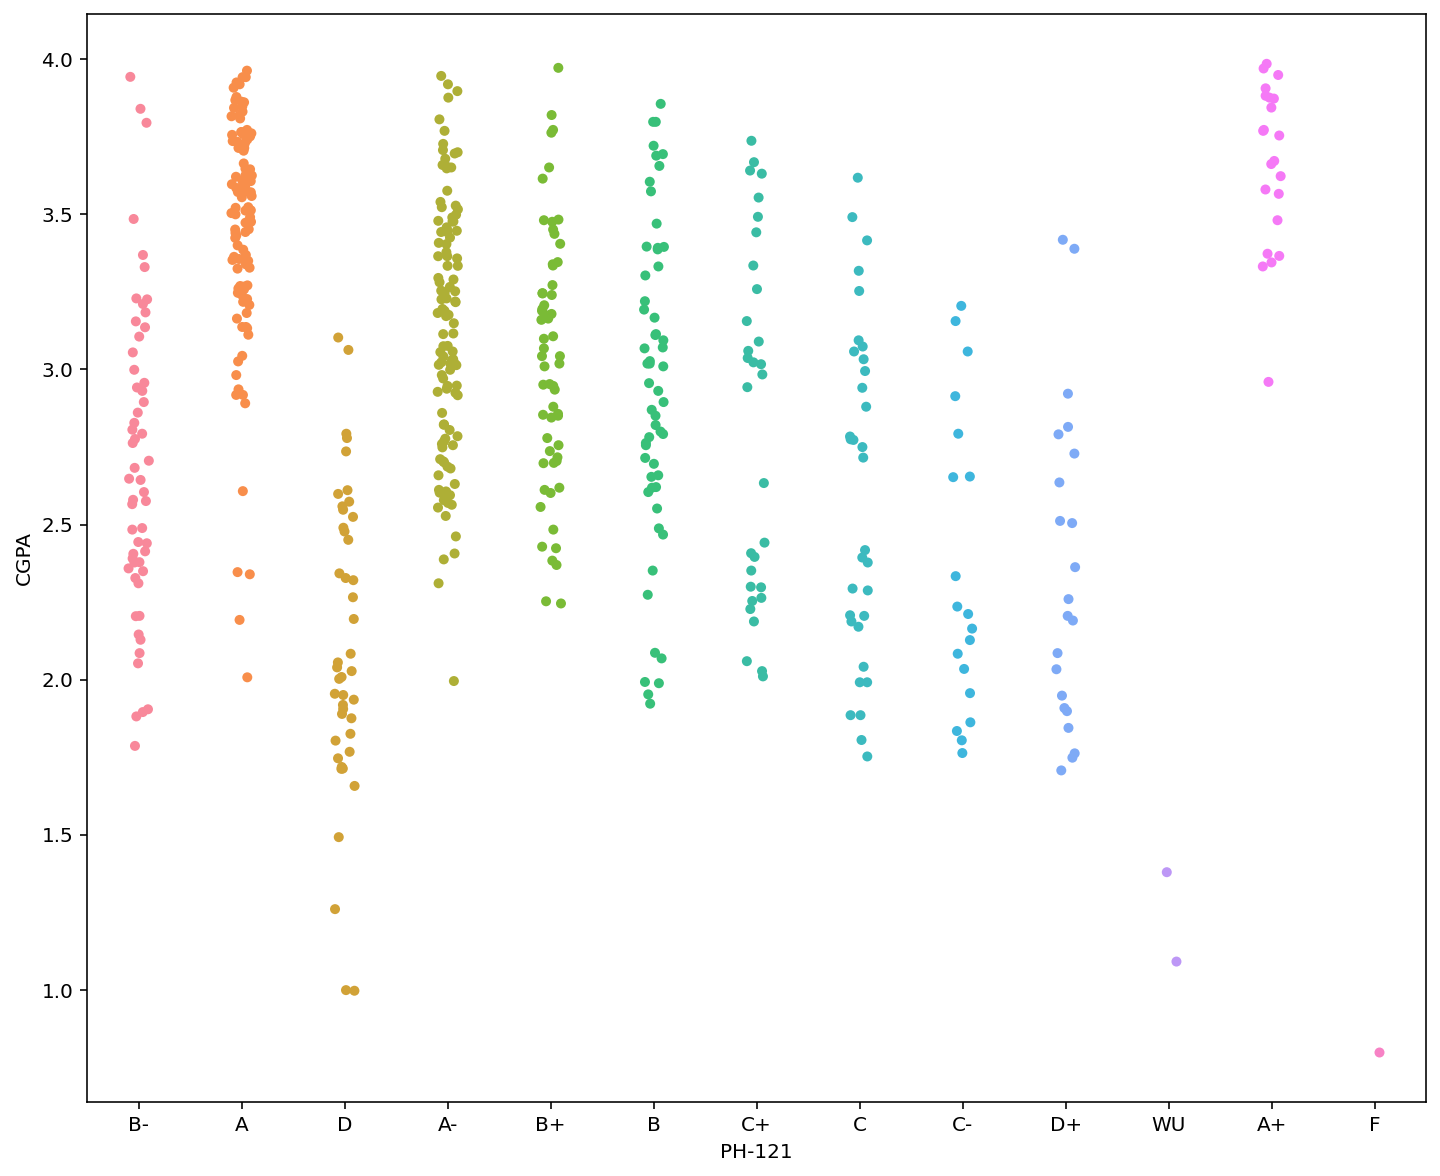

In [47]:
plt.figure(figsize=(12,10))
sns.stripplot(data['PH-121'],
              data['CGPA'])

C:\Users\shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CY-105', ylabel='CGPA'>

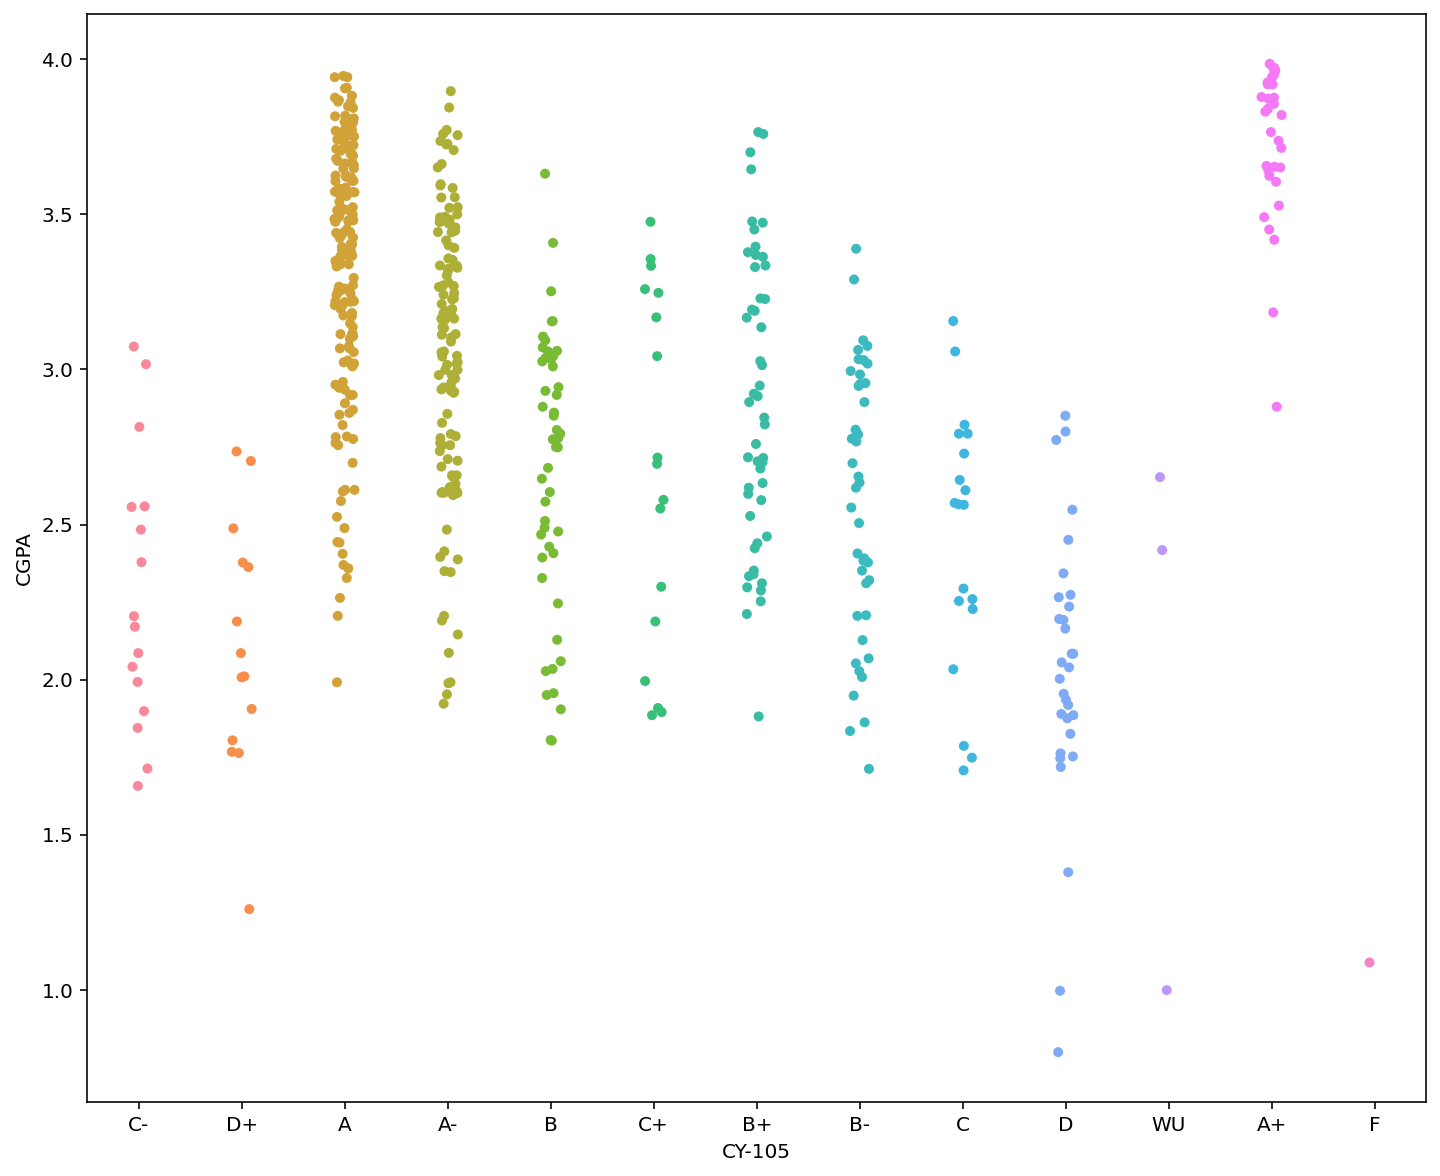

In [49]:
plt.figure(figsize=(12,10))
sns.stripplot(data['CY-105'],
              data['CGPA'])

Processing the dataframe:# Processing the dataframe:

In [55]:
#Separating the label from rest of the features
x=data.copy()
x.drop('CGPA',axis=1,inplace=True)
y=data['CGPA']

# LABEL ENCODER

In [57]:
from sklearn.preprocessing import LabelEncoder 
# Fit the  transform:
LE=LabelEncoder()
data["CGPA"]=LE.fit_transform(data["CGPA"])

In [58]:
 #COUNT_VALUE:
data.CGPA.value_counts()

243    5
256    3
195    3
363    3
73     3
      ..
132    1
55     1
154    1
56     1
14     1
Name: CGPA, Length: 491, dtype: int64

# Normalizing and Scalling the data (1-0 range)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [61]:
#checking upper 2 rows:
data.head(2)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,72
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,48


In [62]:
#importing power transformer:
from sklearn.preprocessing import PowerTransformer

In [79]:
x, y = make_classification(n_samples=571, weights=[0.32], flip_y=0)

# TRAIN TEST SPLIT

In [81]:
#import train_test_split:
from sklearn.model_selection import train_test_split

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1,stratify=y)

In [102]:
# # # Models to Fit & Evaluate

#from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [104]:
#import lOGISTIC REGRESSION model:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Test Accuracy 83.91608391608392
Training Accuracy 83.91608391608392
[[31 15]
 [ 8 89]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.73        46
           1       0.86      0.92      0.89        97

    accuracy                           0.84       143
   macro avg       0.83      0.80      0.81       143
weighted avg       0.84      0.84      0.84       143



In [105]:
#import KNN (KNeighborsClassifier) model:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
pred_train_KNN=KNN.predict(x_train)
print("Test Accuracy",accuracy_score(y_test,predKNN)*100)
print("Training Accuracy",accuracy_score(y_test,predKNN)*100)
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN)) 

Test Accuracy 85.3146853146853
Training Accuracy 85.3146853146853
[[29 17]
 [ 4 93]]
              precision    recall  f1-score   support

           0       0.88      0.63      0.73        46
           1       0.85      0.96      0.90        97

    accuracy                           0.85       143
   macro avg       0.86      0.79      0.82       143
weighted avg       0.86      0.85      0.85       143



In [106]:
#import RandomForestClassifier model:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(x_train,y_train)
predrdf=rdf.predict(x_test)
pred_train_rdf=rdf.predict(x_train)
print("Test Accuracy",accuracy_score(y_test,predrdf)*100)
print("Training Accuracy",accuracy_score(y_test,predrdf)*100)
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

Test Accuracy 90.20979020979021
Training Accuracy 90.20979020979021
[[37  9]
 [ 5 92]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        46
           1       0.91      0.95      0.93        97

    accuracy                           0.90       143
   macro avg       0.90      0.88      0.89       143
weighted avg       0.90      0.90      0.90       143



In [116]:
#import DecisontreeClassifier predicting accuracy for best quality of wine:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy 83.91608391608392
Training Accuracy 83.91608391608392
[[38  8]
 [ 9 88]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        46
           1       0.92      0.91      0.91        97

    accuracy                           0.88       143
   macro avg       0.86      0.87      0.86       143
weighted avg       0.88      0.88      0.88       143



In [108]:
#import SVM model:(support vector machine)
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
pred_train_svc=svc.predict(x_train)
print("Test Accuracy",accuracy_score(y_test,pred_svc)*100)
print("Training Accuracy",accuracy_score(y_test,pred_svc)*100)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Test Accuracy 82.51748251748252
Training Accuracy 82.51748251748252
[[33 13]
 [12 85]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73        46
           1       0.87      0.88      0.87        97

    accuracy                           0.83       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.82      0.83      0.82       143



# So our base model would be Random Forest .
-random Forest seems to fare well compare all the models, based on f1 score & recall score cumulatively Random Forest will leads the way.

In [109]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_1=cross_val_score(lr,x,y,cv=5)
print("Cross Validation Score of LogisticRegression model :",cr_1.mean())

Cross Validation Score of LogisticRegression model : 0.8476735316552251


In [110]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_2=cross_val_score(KNN,x,y,cv=5)
print("Cross Validation Score of KNeighborsClassifier model :",cr_2.mean())

Cross Validation Score of KNeighborsClassifier model : 0.8459649122807018


In [111]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_3=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score of SVM model :",cr_3.mean())

Cross Validation Score of SVM model : 0.858230358504958


In [112]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_4=cross_val_score(rdf,x,y,cv=5)
print("Cross Validation Score of RandomForestClassifier model :",cr_4.mean())

Cross Validation Score of RandomForestClassifier model : 0.8967200610221205


In [117]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_5=cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of DecisionTreeClassifier model :",cr_5.mean())

Cross Validation Score of DecisionTreeClassifier model : 0.8598932112890922
